# Manipulación de datos con errores o nulos.

In [ ]:
# importamos las librerías esenciales
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
%matplotlib inline



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/marcusRB/The_Bridge_School_DataScience_PT/main/02_DataAnalysis/dataset/dirty_data.csv")

In [ ]:
df.head(5)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [ ]:
df.describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


In [ ]:
df.info

<bound method DataFrame.info of                     date            station  PRCP  ...  TOBS  WESF  inclement_weather
0    2018-01-01T00:00:00                  ?   0.0  ...   NaN   NaN                NaN
1    2018-01-01T00:00:00                  ?   0.0  ...   NaN   NaN                NaN
2    2018-01-01T00:00:00                  ?   0.0  ...   NaN   NaN                NaN
3    2018-01-02T00:00:00  GHCND:USC00280907   0.0  ... -12.2   NaN              False
4    2018-01-03T00:00:00  GHCND:USC00280907   0.0  ... -13.3   NaN              False
..                   ...                ...   ...  ...   ...   ...                ...
760  2018-12-31T00:00:00  GHCND:USC00280907   0.0  ...  -2.8   NaN              False
761  2018-12-31T00:00:00  GHCND:USC00280907   0.0  ...  -2.8   NaN              False
762  2018-12-31T00:00:00  GHCND:USC00280907   0.0  ...  -2.8   NaN              False
763  2018-12-31T00:00:00                  ?   0.0  ...   NaN   NaN                NaN
764  2018-12-31T00:00:

In [ ]:
df.shape

(765, 10)

In [ ]:
df.columns

Index(['date', 'station', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WESF', 'inclement_weather'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [ ]:
df.describe(include='all') # incluimos los atributos categóricos

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
count,765,765,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000,408
unique,324,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2018-07-05T00:00:00,GHCND:USC00280907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,8,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384
mean,NaN,NaN,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909,NaN
std,NaN,NaN,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832,NaN
min,NaN,NaN,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000,NaN
25%,NaN,NaN,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000,NaN
50%,NaN,NaN,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000,NaN
75%,NaN,NaN,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000,NaN


In [ ]:
# evaluación de los valores nulos - missings values
contains_null = df[
                   df.SNOW.isna() | df.SNWD.isna() | df.TOBS.isna() |
                   df.WESF.isna() | df.inclement_weather.isna()
]
contains_null.shape[0]

765

In [ ]:
contains_null.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [ ]:
print(df.isna().sum()) # comprobación de valores nulos absolutos

date                   0
station                0
PRCP                   0
SNOW                 188
SNWD                 188
TMAX                   0
TMIN                   0
TOBS                 367
WESF                 754
inclement_weather    357
dtype: int64


In [ ]:
print(df.isna().sum()/len(df)*100)

date                  0.000000
station               0.000000
PRCP                  0.000000
SNOW                 24.575163
SNWD                 24.575163
TMAX                  0.000000
TMIN                  0.000000
TOBS                 47.973856
WESF                 98.562092
inclement_weather    46.666667
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


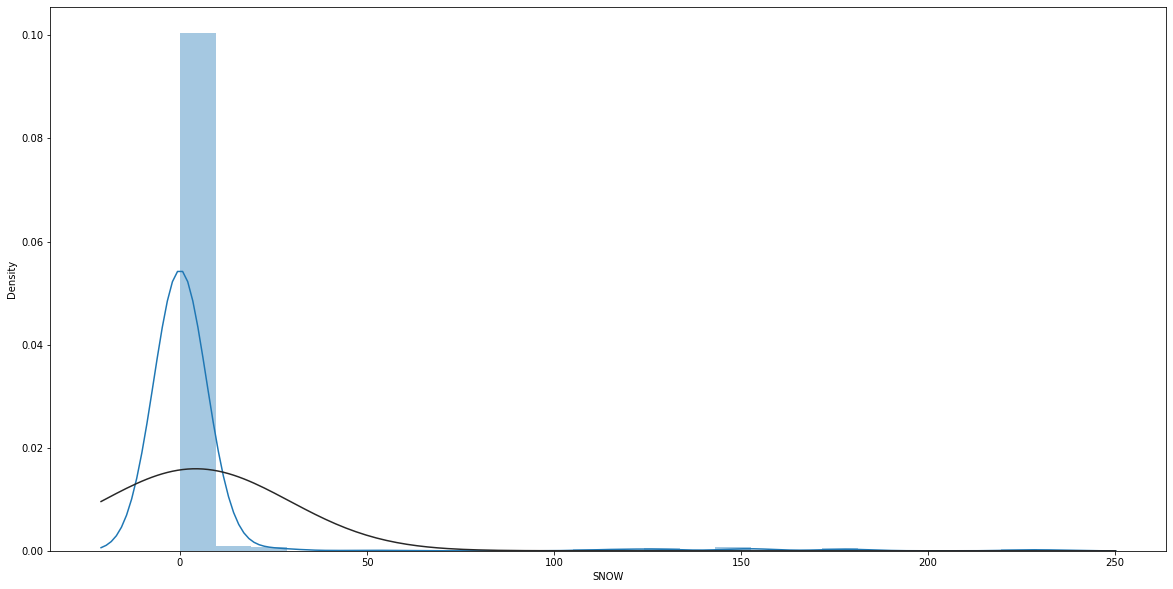

In [ ]:
# Plot the distribution
plt.figure(figsize= [20.0, 10.0])
sns.distplot(df['SNOW'], fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


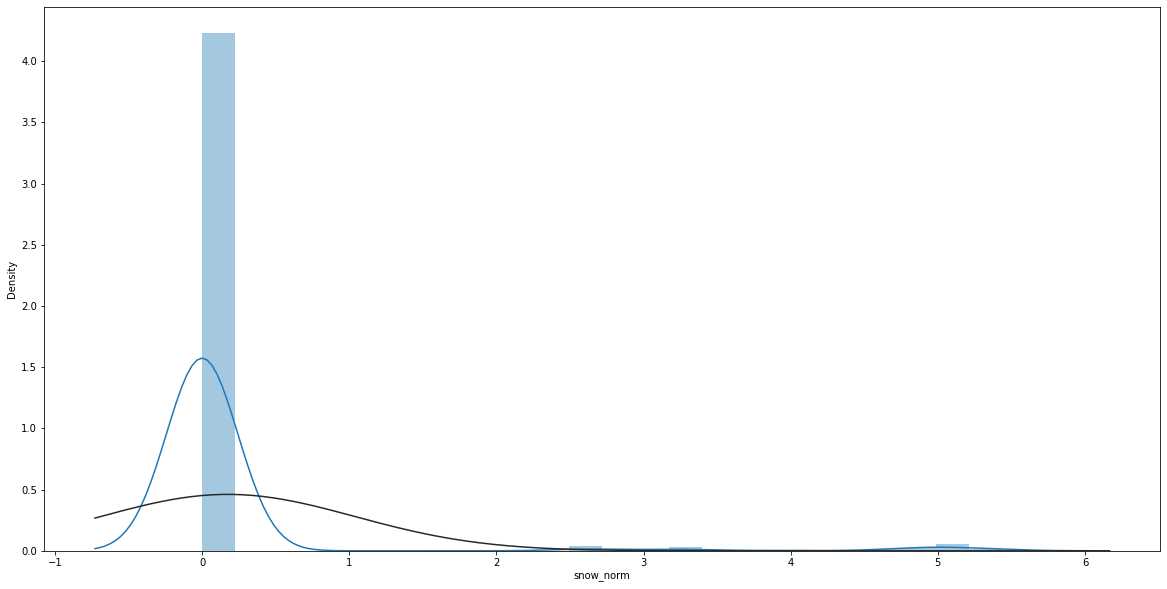

In [ ]:
plt.figure(figsize= [20.0, 10.0])
df['snow_norm'] = np.log1p(df['SNOW'])
sns.distplot(df['snow_norm'], fit=norm)

In [ ]:
df[df.inclement_weather == 'NaN'].shape[0]

0

In [ ]:
df[df.inclement_weather.isna()].shape[0]

357

In [ ]:
df[df.inclement_weather == np.nan].shape[0]

0

In [ ]:
df[df.inclement_weather.isnull()].shape[0]

357

In [ ]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

In [ ]:
# de manera iterativa podemos buscar valores nulos
def get_inf_count(df):
  """Encuentra valores -inf / +inf"""
  return {
      col: df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
  }

In [ ]:
# otra forma de iterar sin una función
for i in df:
  lista = []
  lista.append(i.isna().sum()/len(i)*100)
  print(lista)

In [ ]:
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [ ]:
missing_zero_values_table(df)

Your selected dataframe has 11 columns and 765 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
WESF,0,754,98.6,754,98.6,float64
TOBS,22,367,48.0,389,50.8,float64
inclement_weather,384,357,46.7,741,96.9,object
SNOW,553,188,24.6,741,96.9,float64
SNWD,0,188,24.6,188,24.6,float64
snow_norm,553,188,24.6,741,96.9,float64


In [ ]:
print(df.nunique())

date                 324
station                2
PRCP                  96
SNOW                   9
SNWD                   2
TMAX                  69
TMIN                  68
TOBS                  69
WESF                   7
inclement_weather      2
snow_norm              9
dtype: int64


In [ ]:
get_inf_count(df)

{'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'date': 0,
 'inclement_weather': 0,
 'snow_norm': 0,
 'station': 0}

In [ ]:
pd.DataFrame({
    'np.inf Snow': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


In [ ]:
# tratar los valores duplicados
df[df.duplicated()].shape[0]

284

In [ ]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.000000
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.000000
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False,0.000000
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False,0.000000
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True,5.438079


In [ ]:
df.sample(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
732,2018-12-16T00:00:00,GHCND:USC00280907,23.9,0.0,-inf,10.0,2.2,2.8,NaN,False,0.0
745,2018-12-25T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.0
626,2018-10-26T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,9.4,-0.6,-0.6,NaN,False,0.0
669,2018-11-13T00:00:00,?,25.1,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN,NaN
712,2018-12-07T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.0
356,2018-06-18T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,32.2,15.0,18.9,NaN,False,0.0
642,2018-11-02T00:00:00,GHCND:USC00280907,1.0,0.0,-inf,21.1,8.9,19.4,NaN,False,0.0
46,2018-01-23T00:00:00,GHCND:USC00280907,18.0,0.0,-inf,8.9,2.2,5.0,NaN,False,0.0
221,2018-04-19T00:00:00,?,2.5,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN,NaN
60,2018-01-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,6.7,-10.0,-8.9,NaN,False,0.0


## Manipulación de duplicados

In [40]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

In [42]:
# transformación de valores en datetime
df.date = pd.to_datetime(df.date)

In [43]:
# guardamos la información
station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date').WESF

In [44]:
# Ordenamos los valores ? 
df.sort_values('station', ascending=False, inplace=True)

In [45]:
# eliminamos los duplicados de date
df_deduped = df.drop_duplicates('date')

In [47]:
df_deduped = df.drop(columns='station').set_index('date').sort_index()

In [48]:
# nos quedamos con los valores válidos WESF
df_deduped = df_deduped.assign(
    WESF=lambda x: x.WESF.combine_first(station_qm_wesf)
)

In [49]:
df_deduped.shape

(765, 9)

In [51]:
df_deduped.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.0
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.0
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False,0.0


In [52]:
# Dropna
df_deduped.dropna().shape

(6, 9)

In [59]:
df_deduped.dropna(how='all').shape

(765, 9)

In [63]:
df_deduped.dropna(how='any',axis=0).shape # valoramos si eliminar las filas por valores na

(6, 9)

In [64]:
df_deduped.dropna(how='all', subset=[
                                     'inclement_weather',
                                     'SNOW',
                                     'SNWD'
]).shape

(588, 9)

In [65]:
df_deduped.dropna(axis='columns', thresh=df_deduped.shape[0] * .75).columns

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'snow_norm'], dtype='object')

In [66]:
df_deduped.loc[:,'WESF'].fillna(0, inplace=True)
df_deduped.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,0.0,NaN,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False,0.0


In [67]:
# imputaciones por valores
df_deduped = df_deduped.assign(
    TMAX=lambda x: x.TMAX.replace(5505, np.nan),
    TMIN=lambda x: x.TMIN.replace(-40, np.nan),
)


In [68]:
# aplicar ffill o bfill
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'),
    TMIN=lambda x: x.TMIN.fillna(method='ffill')
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False,0.0


In [69]:
df_deduped.assign(
    SNWD=lambda x: np.nan_to_num(x.SNWD)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,-1.797693e+308,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,-1.797693e+308,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,-1.797693e+308,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-02,0.0,0.0,-1.797693e+308,-8.3,-16.1,-12.2,0.0,False,0.0
2018-01-03,0.0,0.0,-1.797693e+308,-4.4,-13.9,-13.3,0.0,False,0.0


In [70]:
df_deduped.assign(
    SNWD=lambda x: x.SNWD.clip(0, x.SNOW)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-01,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2018-01-02,0.0,0.0,0.0,-8.3,-16.1,-12.2,0.0,False,0.0
2018-01-03,0.0,0.0,0.0,-4.4,-13.9,-13.3,0.0,False,0.0


In [71]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(x.TMAX.median()),
    TMIN=lambda x: x.TMIN.fillna(x.TMIN.median()),
    # average of TMAX and TMIN
    TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,-inf,14.4,5.6,10.0,0.0,NaN,0.0
2018-01-01,0.0,0.0,-inf,14.4,5.6,10.0,0.0,NaN,0.0
2018-01-01,0.0,0.0,-inf,14.4,5.6,10.0,0.0,NaN,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False,0.0


In [72]:
df_deduped.apply(
    # rolling calculations will be covered in chapter 4, this is a rolling 7-day median
    # we set min_periods (# of periods required for calculation) to 0 so we always get a result 
    lambda x: x.fillna(x.rolling(7, min_periods=0).median())
).head(10)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather,snow_norm
date,,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN,0.000000
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN,0.000000
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN,0.000000
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False,0.000000
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False,0.000000
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False,0.000000
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False,0.000000
2018-01-04,20.6,229.0,inf,-4.4,-13.9,-13.3,19.3,True,5.438079
2018-01-04,20.6,229.0,inf,-4.4,-13.9,-13.3,19.3,True,5.438079


In [73]:
df_deduped\
    .reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))\
    .apply(lambda x: x.interpolate())\
    .head(10)

ValueError: ignored